In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt

import data
import pandas as pd
import glob
import matplotlib.pyplot as plt
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
import mne
import numpy as np
import seaborn as sns
from os import listdir
from os.path import isfile, join

sns.set(font_scale=1)

In [2]:
participants_list_csv = ['S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19']
participant_csv = participants_list_csv[5]
print(participant_csv)

S11


In [3]:
path_csv = 'C:/Users/bribeiroriccioppo/Desktop/ULTEEM/'+participant_csv+'/'

csv_files = [csv for csv in listdir(path_csv) if isfile(join(path_csv, csv))]

for i in range(len(csv_files)):
    csv_files[i] = path_csv + csv_files[i]

In [4]:
path = 'C:/Users/bribeiroriccioppo/Desktop/mental-fatigue/Raw Data/'
xdf_files = [xdf for xdf in listdir(path) if isfile(join(path, xdf))]

for i in range(len(xdf_files)):
    xdf_files[i] = path + xdf_files[i]

In [5]:
csv_files

['C:/Users/bribeiroriccioppo/Desktop/ULTEEM/S11/F3295C6CC0EB_Session_0_2022_EEG_Data.csv',
 'C:/Users/bribeiroriccioppo/Desktop/ULTEEM/S11/F3295C6CC0EB_Session_1_2022_EEG_Data.csv',
 'C:/Users/bribeiroriccioppo/Desktop/ULTEEM/S11/F3295C6CC0EB_Session_2_2022_EEG_Data.csv',
 'C:/Users/bribeiroriccioppo/Desktop/ULTEEM/S11/F3295C6CC0EB_Session_3_2022_EEG_Data.csv',
 'C:/Users/bribeiroriccioppo/Desktop/ULTEEM/S11/F3295C6CC0EB_Session_4_2022_EEG_Data.csv',
 'C:/Users/bribeiroriccioppo/Desktop/ULTEEM/S11/F3295C6CC0EB_Session_5_2022_EEG_Data.csv']

In [6]:
xdf_file = xdf_files[1]

In [7]:
xdf_file

'C:/Users/bribeiroriccioppo/Desktop/mental-fatigue/Raw Data/S11_2022-05-30.xdf'

In [8]:
#participants, powers_df = data.preprocessing(csv_files, xdf_file, powers=True)

In [9]:
participant, df, times = data.load_data(csv_files, xdf_file)

Stream 5: Calculated effective sampling rate 95.2967 Hz is different from specified rate 60.0000 Hz.


<Annotations | 42 segments: 0.0 (1), 1.0 (1), 10.0 (1), 11.0 (1), 12.0 ...>


C:\Users\bribeiroriccioppo\Desktop\mental-fatigue\ULTEEMNite\data.py:113: RuntimeWarning: Omitted 42 annotation(s) that were outside data range.
  raw.set_annotations(annotations)


In [10]:
#data.calculate_powers(participant)

In [11]:
df 318851006

,TS[raw],TimeStamp,EEG,EEG[-]
0,318851006,0.000000,0.000000,0.000000
1,318851134,0.003906,-0.314540,-0.314540
2,318851262,0.007812,-0.314540,-0.314540
3,318851390,0.011719,-0.629080,-0.629080
4,318851518,0.015625,-0.943620,-0.943620
...,...,...,...,...
1319451,487740734,144.730469,-5528.985163,-5528.985163
1319452,487740862,144.734375,-5564.842730,-5564.842730
1319453,487740990,144.738281,-5004.646884,-5004.646884
1319454,487741118,144.742188,-4433.442136,-4433.442136


In [28]:
import time

In [29]:
time.time()

1655992561.2630582

In [12]:
participant

{'S11_2022-05-30': {'EEG': <RawArray | 1 x 1319456 (5154.1 s), ~10.1 MB, data loaded>,
  'Blocks':     block_idx  block_id       init_ts        end_ts    lsl_end_ts  \
  0         0.0       0.0  1.653918e+09  1.653918e+09  21909.225034   
  1         1.0       1.0  1.653918e+09  1.653918e+09  22029.228238   
  2         2.0       2.0  1.653918e+09  1.653918e+09  22044.335683   
  3         3.0       3.0  1.653918e+09  1.653918e+09  22165.309428   
  4         4.0       4.0  1.653918e+09  1.653918e+09  22195.931387   
  5         5.0       5.0  1.653918e+09  1.653918e+09  22210.264091   
  6         6.0       6.0  1.653918e+09  1.653918e+09  22240.368197   
  7         7.0       7.0  1.653918e+09  1.653918e+09  22270.778738   
  8         8.0       8.0  1.653918e+09  1.653918e+09  22301.091478   
  9         9.0       9.0  1.653918e+09  1.653918e+09  22305.388622   
  10       10.0      10.0  1.653918e+09  1.653918e+09  22335.412941   
  11       11.0      12.0  1.653918e+09  1.653918e+

In [13]:
raw = participant['S11_2022-05-30']['EEG']
blocks_df = participant['S11_2022-05-30']['Blocks']

In [14]:
blocks_df

,block_idx,block_id,init_ts,end_ts,lsl_end_ts,lsl_init_ts,onset,duration
0,0.0,0.0,1.653918e+09,1.653918e+09,21909.225034,21885.894168,21885.894168,23.330866
1,1.0,1.0,1.653918e+09,1.653918e+09,22029.228238,21909.225774,21909.221868,120.002465
2,2.0,2.0,1.653918e+09,1.653918e+09,22044.335683,22029.228500,22029.220688,15.107183
3,3.0,3.0,1.653918e+09,1.653918e+09,22165.309428,22044.340204,22044.328486,120.969223
4,4.0,4.0,1.653918e+09,1.653918e+09,22195.931387,22165.311342,22165.295717,30.620045
5,5.0,5.0,1.653918e+09,1.653918e+09,22210.264091,22195.931116,22195.911585,14.332975
6,6.0,6.0,1.653918e+09,1.653918e+09,22240.368197,22210.265711,22210.242273,30.102486
7,7.0,7.0,1.653918e+09,1.653918e+09,22270.778738,22240.369532,22240.342188,30.409207
8,8.0,8.0,1.653918e+09,1.653918e+09,22301.091478,22270.779887,22270.748637,30.311591
9,9.0,9.0,1.653918e+09,1.653918e+09,22305.388622,22301.091250,22301.056094,4.297372


In [15]:
raw

<RawArray | 1 x 1319456 (5154.1 s), ~10.1 MB, data loaded>

In [16]:
raw.plot_psd();

C:\Users\BRIBEI~1\AppData\Local\Temp/ipykernel_3592/3341777298.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd();


In [17]:
raw.plot();

Using matplotlib as 2D backend.


In [18]:
filtered_eeg = raw.get_data()

In [19]:
filtered_eeg

array([[   17.30848009, -1593.12680446, -2535.87422942, ...,
         -476.65296559,  -103.33124443,     2.80461639]])

In [25]:
times

0            0.000000
1            0.003906
2            0.007812
3            0.011719
4            0.015625
              ...    
1319451    144.730469
1319452    144.734375
1319453    144.738281
1319454    144.742188
1319455    144.746094
Name:  TimeStamp, Length: 1319456, dtype: float64

In [20]:
win = 125 # window size
nb_rec = len(filtered_eeg)
resp_start = blocks_df.lsl_init_ts.values[1]- blocks_df.lsl_init_ts.values[0]
rej_th = 30
FREQ_BANDS = [
    ("Delta", 1, 3),
    ("Theta", 4, 7),
    ("Alpha", 8, 13),
    ("Beta", 14, 30),
    ("Gamma", 32, 42),
]

In [21]:
powers_df, EEG_df = data.get_power(filtered_eeg, win, nb_rec, resp_start, rej_th, FREQ_BANDS, times)

In [22]:
powers_df

""


In [23]:
EEG_df

""


Channels marked as bad: none


In [33]:
win = 125 # window size
nb_rec = len(filtered_eeg)
rej_th = 50
FREQ_BANDS = [
    ("Delta", 1, 3),
    ("Theta", 4, 7),
    ("Alpha", 8, 13),
    ("Beta", 14, 30),
    ("Gamma", 32, 42),
]


def get_power(filtered_eeg, win, nb_rec, rej_th, FREQ_BANDS):

    df_power = pd.DataFrame()
    df_EEG = pd.DataFrame()

    for i in range(0, nb_rec-win, win):
        # get filtered eeg data 
        EEG_Ch = filtered_eeg[i:i + win]
        bad_Ch = 0
        if np.max(EEG_Ch)-np.min(EEG_Ch) > rej_th:
            bad_Ch = 1  
        
        # get poower
        pow_Ch = []
        p_sum_Ch = 0
        rel_pow_data_Ch = []
    
        for f in FREQ_BANDS:
            
            freqs_Ch, powers_Ch = compute_spectrum_welch(EEG_Ch, 125, f_range=[f[1], f[2]])
            pow_Ch.append(np.mean(powers_Ch))
            p_sum_Ch = p_sum_Ch + np.mean(powers_Ch)
            
        rel_pow_data_Ch = (pow_Ch/p_sum_Ch)
    
    
        # make eeg df 
        df_eeg = pd.DataFrame()
        df_eeg["EEG_Ch"] = EEG_Ch
        df_eeg["bad_Ch"] = [bad_Ch]*len(EEG_Ch)
        df_eeg["block"] = [blc_id]*len(df_eeg)
        df_eeg["time"] = time[i:i+win]
        df_EEG = pd.concat([df_EEG, df_eeg])
    
        # make pow df
        df_pow_Ch = pd.DataFrame([pow_Ch], columns=["Delta_Ch","Theta_Ch","Alpha_Ch","Beta_Ch","Gamma_Ch"])
        df_pow_Ch_rel = pd.DataFrame([rel_pow_data_Ch], columns=["Delta_Ch_rel","Theta_Ch_rel","Alpha_Ch_rel","Beta_Ch_rel","Gamma_Ch_rel"])
        
        df_pow = pd.concat([df_pow_Ch_rel ,df_pow_Ch], axis=1)
        df_pow["time"]=time[i]
        df_pow["bad_Ch"]=bad_Ch
        df_power = pd.concat([df_power, df_pow])
    
    df_power = df_power.reset_index(drop=True)
    df_EEG = df_EEG.reset_index(drop=True)
    return (df_power,df_EEG)

In [32]:
df_power

NameError: name 'df_power' is not defined

In [12]:
# # Notch filters (sub-harmonic and power line)
# mne.filter.notch_filter(df[' EEG'],256,[25,50])

# # High-pass filter
# mne.filter.filter_data(df[' EEG'],256,2,None,method='iir') 

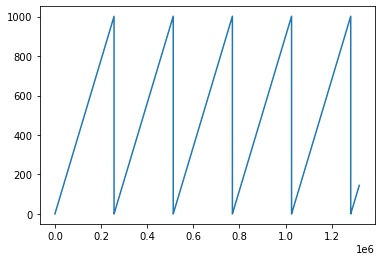

In [40]:
plt.plot(df[' TimeStamp'])

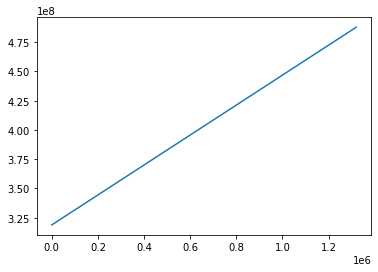

In [41]:
plt.plot(df['TS[raw]'])

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(df['TS[raw]'],df[' EEG'],c='b');

In [35]:
plt.figure(figsize=(20, 10))
#plt.plot(df[' TimeStamp'],df[' EEG'],c='b')
plt.plot(df['TS[raw]'].iloc[700:1000],df[' EEG'].iloc[700:1000],c='b')